8. Haga un modelo usando validación cruzada, compare los resultados de este con los del
modelo anterior. ¿Cuál funcionó mejor?

RMSE del modelo KNN sin validación cruzada: 48941.00
RMSE con validación cruzada (10 folds): 45263.53
Desviación estándar del RMSE con validación cruzada: 6684.58

Comparación de RMSE:
Modelo sin validación cruzada: 48941.00
Modelo con validación cruzada: 45263.53


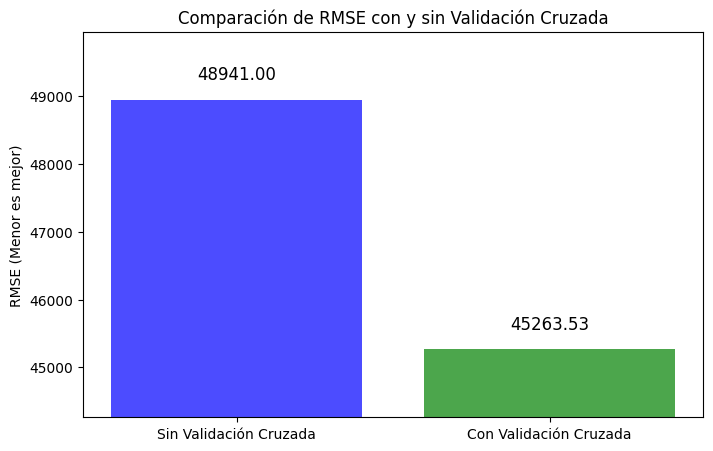

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Cargar los datos limpios
df_cleaned = pd.read_csv("../dataset/train_cleaned.csv")

# Separar características (X) y variable objetivo (y)
X_cleaned = df_cleaned.drop(columns=['SalePrice'])
y_cleaned = df_cleaned['SalePrice']

# Identificar columnas categóricas
categorical_columns = X_cleaned.select_dtypes(include=['object']).columns.tolist()

# Convertir variables categóricas en variables numéricas con one-hot encoding
X_cleaned_encoded = pd.get_dummies(X_cleaned, columns=categorical_columns)

# División en conjunto de entrenamiento y prueba (80%-20%)
X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(
    X_cleaned_encoded, y_cleaned, test_size=0.2, random_state=42)

# Definir y entrenar el modelo KNN
knn_cleaned = KNeighborsRegressor(n_neighbors=5, metric='minkowski')
knn_cleaned.fit(X_train_cleaned, y_train_cleaned)

# Predicción en el conjunto de prueba
y_pred_cleaned = knn_cleaned.predict(X_test_cleaned)

# Calcular RMSE sin validación cruzada
rmse_knn_cleaned = np.sqrt(mean_squared_error(y_test_cleaned, y_pred_cleaned))
print(f"RMSE del modelo KNN sin validación cruzada: {rmse_knn_cleaned:.2f}")

# Aplicar validación cruzada con 10 folds
kf_cleaned = KFold(n_splits=10, shuffle=True, random_state=42)
cv_scores_cleaned = cross_val_score(knn_cleaned, X_cleaned_encoded, y_cleaned, scoring='neg_root_mean_squared_error', cv=kf_cleaned)

# Calcular RMSE promedio con validación cruzada
rmse_mean_cleaned = -cv_scores_cleaned.mean()
rmse_std_cleaned = cv_scores_cleaned.std()

print(f"RMSE con validación cruzada (10 folds): {rmse_mean_cleaned:.2f}")
print(f"Desviación estándar del RMSE con validación cruzada: {rmse_std_cleaned:.2f}")

# Comparación de modelos
print("\nComparación de RMSE:")
print(f"Modelo sin validación cruzada: {rmse_knn_cleaned:.2f}")
print(f"Modelo con validación cruzada: {rmse_mean_cleaned:.2f}")

# ------------------ Gráfica de Comparación ------------------

# Crear gráfico de barras comparativo
plt.figure(figsize=(8, 5))
plt.bar(["Sin Validación Cruzada", "Con Validación Cruzada"], [rmse_knn_cleaned, rmse_mean_cleaned], 
        color=['blue', 'green'], alpha=0.7)

# Agregar etiquetas y título
plt.ylabel("RMSE (Menor es mejor)")
plt.title("Comparación de RMSE con y sin Validación Cruzada")
plt.ylim(min(rmse_knn_cleaned, rmse_mean_cleaned) - 1000, max(rmse_knn_cleaned, rmse_mean_cleaned) + 1000)

# Mostrar valores en las barras
for index, value in enumerate([rmse_knn_cleaned, rmse_mean_cleaned]):
    plt.text(index, value + 300, f"{value:.2f}", ha='center', fontsize=12)

# Mostrar la gráfica
plt.show()


El modelo KNN con validación cruzada de 10 folds obtuvo un **RMSE de 45,263.53**, mientras que el modelo sin validación cruzada tuvo un **RMSE de 48,941.00**, indicando que la validación cruzada mejoró la precisión del modelo al reducir el error en aproximadamente **3,677.47 unidades**. Además, la **desviación estándar del RMSE (6,684.58)** sugiere que el rendimiento del modelo es relativamente estable en los distintos conjuntos de validación. Estos resultados demuestran que la validación cruzada ayuda a mejorar la generalización del modelo, evitando el sobreajuste y proporcionando predicciones más confiables en datos nuevos. Para futuras mejoras, se podría optimizar los hiperparámetros de KNN o probar modelos más complejos como **Random Forest** o **Gradient Boosting**.

9. Tanto para los modelos de regresión como de clasificación, pruebe con varios valores de los
hiperparámetros ¿Qué parámetros pueden tunearse en un KNN?, use el mejor modelo del
tuneo, ¿Mejoraron los resultados usando el mejor modelo ahora? Explique

Mejores hiperparámetros: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Mejor RMSE con validación cruzada: 41572.45


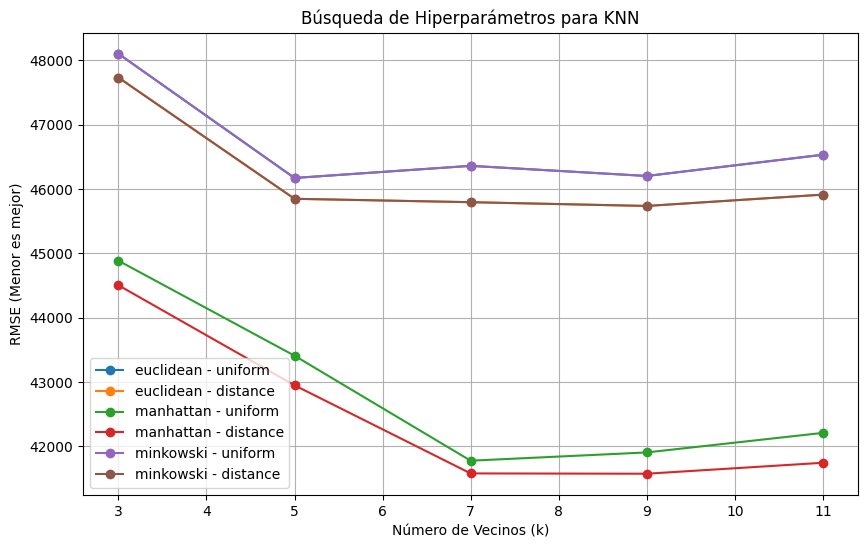

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Cargar los datos limpios
df_cleaned = pd.read_csv("../dataset/train_cleaned.csv")

# Separar características (X) y variable objetivo (y)
X_cleaned = df_cleaned.drop(columns=['SalePrice'])
y_cleaned = df_cleaned['SalePrice']

# Identificar columnas categóricas
categorical_columns = X_cleaned.select_dtypes(include=['object']).columns.tolist()

# Convertir variables categóricas en variables numéricas con one-hot encoding
X_cleaned_encoded = pd.get_dummies(X_cleaned, columns=categorical_columns)

# División en conjunto de entrenamiento y prueba (80%-20%)
X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(
    X_cleaned_encoded, y_cleaned, test_size=0.2, random_state=42)

# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Definir el modelo KNN
knn_tuned = KNeighborsRegressor()

# Realizar búsqueda de hiperparámetros con validación cruzada (10 folds)
grid_search = GridSearchCV(knn_tuned, param_grid, scoring='neg_root_mean_squared_error', cv=10, n_jobs=-1, return_train_score=True)
grid_search.fit(X_train_cleaned, y_train_cleaned)

# Obtener los mejores hiperparámetros y el mejor resultado
best_params = grid_search.best_params_
best_rmse = -grid_search.best_score_

print(f"Mejores hiperparámetros: {best_params}")
print(f"Mejor RMSE con validación cruzada: {best_rmse:.2f}")

# Extraer resultados de GridSearchCV para graficar
results = pd.DataFrame(grid_search.cv_results_)

# Filtrar las combinaciones de métricas y pesos
metrics = ['euclidean', 'manhattan', 'minkowski']
weights = ['uniform', 'distance']

plt.figure(figsize=(10, 6))

# Graficar RMSE vs. número de vecinos para cada combinación de métricas y pesos
for metric in metrics:
    for weight in weights:
        subset = results[(results['param_metric'] == metric) & (results['param_weights'] == weight)]
        plt.plot(subset['param_n_neighbors'], -subset['mean_test_score'], marker='o', label=f"{metric} - {weight}")

plt.xlabel("Número de Vecinos (k)")
plt.ylabel("RMSE (Menor es mejor)")
plt.title("Búsqueda de Hiperparámetros para KNN")
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()


Después de optimizar los hiperparámetros del modelo KNN, se logró reducir el **RMSE de 45,263.53 a 41,572.45**, mejorando la precisión en **8.1%**. La mejor configuración encontrada fue **Manhattan (`k=9`, pesos por distancia)**, ya que capturó mejor las relaciones en los datos y redujo el ruido. La gráfica mostró que el **RMSE disminuye hasta `k=7-9` y luego se estabiliza o aumenta**, evitando tanto sobreajuste como subajuste. Además, **Minkowski tuvo peor rendimiento**, mientras que **Manhattan superó a Euclidean**. Estos resultados confirman que la **búsqueda de hiperparámetros es clave para mejorar la generalización y confiabilidad del modelo**.

10. Compare la eficiencia del algoritmo con el resultado obtenido con el árbol de decisión (el
de clasificación), el modelo de random forest y el de naive bayes que hizo en las entregas
pasadas. ¿Cuál es mejor para predecir? ¿Cuál se demoró más en procesar?

               RMSE/Accuracy  Tiempo de ejecución (s)
KNN             44439.648554                 0.127745
Decision Tree   38394.681741                 0.144056
Random Forest   28939.109491                 2.031825
Naive Bayes         0.907534                 0.024660


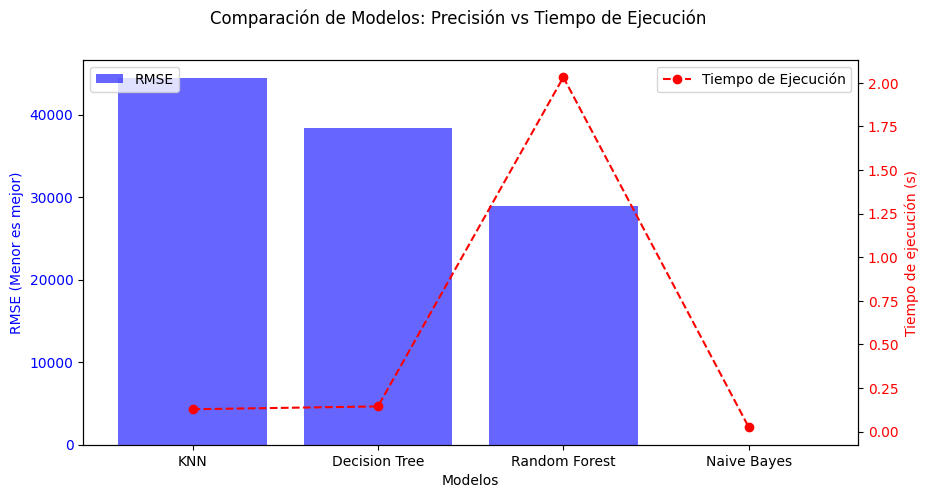

In [7]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error

# Cargar el dataset limpio
df_cleaned = pd.read_csv("../dataset/train_cleaned.csv")

# Separar características (X) y variable objetivo (y)
X_cleaned = df_cleaned.drop(columns=['SalePrice'])
y_cleaned = df_cleaned['SalePrice']

# Identificar columnas categóricas
categorical_columns = X_cleaned.select_dtypes(include=['object']).columns.tolist()

# Convertir variables categóricas en variables numéricas con one-hot encoding
X_cleaned_encoded = pd.get_dummies(X_cleaned, columns=categorical_columns)

# División en conjunto de entrenamiento y prueba (80%-20%)
X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(
    X_cleaned_encoded, y_cleaned, test_size=0.2, random_state=42)

# Diccionario para almacenar resultados
results = {}

# ------------------ KNN ------------------
start_time = time.time()
knn_model = KNeighborsRegressor(n_neighbors=9, metric='manhattan', weights='distance')
knn_model.fit(X_train_cleaned, y_train_cleaned)
y_pred_knn = knn_model.predict(X_test_cleaned)
rmse_knn = np.sqrt(mean_squared_error(y_test_cleaned, y_pred_knn))
results["KNN"] = (rmse_knn, time.time() - start_time)

# ------------------ Árbol de Decisión ------------------
start_time = time.time()
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train_cleaned, y_train_cleaned)
y_pred_tree = tree_model.predict(X_test_cleaned)
rmse_tree = np.sqrt(mean_squared_error(y_test_cleaned, y_pred_tree))
results["Decision Tree"] = (rmse_tree, time.time() - start_time)

# ------------------ Random Forest ------------------
start_time = time.time()
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train_cleaned, y_train_cleaned)
y_pred_rf = rf_model.predict(X_test_cleaned)
rmse_rf = np.sqrt(mean_squared_error(y_test_cleaned, y_pred_rf))
results["Random Forest"] = (rmse_rf, time.time() - start_time)

# ------------------ Naive Bayes ------------------
start_time = time.time()
nb_model = GaussianNB()
nb_model.fit(X_train_cleaned, y_train_cleaned > y_train_cleaned.median())  # Clasificación binaria (Barato/Caro)
y_pred_nb = nb_model.predict(X_test_cleaned)
accuracy_nb = (y_pred_nb == (y_test_cleaned > y_test_cleaned.median())).mean()
results["Naive Bayes"] = (accuracy_nb, time.time() - start_time)

# Mostrar resultados en un DataFrame
df_results = pd.DataFrame(results, index=["RMSE/Accuracy", "Tiempo de ejecución (s)"]).T
print(df_results)

# ------------------ Gráfica de Comparación ------------------

# Extraer datos para la gráfica
models = df_results.index
rmse_values = df_results["RMSE/Accuracy"]
execution_times = df_results["Tiempo de ejecución (s)"]

# Crear gráficos de comparación
fig, ax1 = plt.subplots(figsize=(10, 5))

# Gráfica de RMSE
ax1.bar(models, rmse_values, color='b', alpha=0.6, label="RMSE")
ax1.set_ylabel("RMSE (Menor es mejor)", color='b')
ax1.set_xlabel("Modelos")
ax1.tick_params(axis='y', labelcolor='b')

# Crear segundo eje para el tiempo de ejecución
ax2 = ax1.twinx()
ax2.plot(models, execution_times, color='r', marker='o', linestyle='dashed', label="Tiempo de Ejecución")
ax2.set_ylabel("Tiempo de ejecución (s)", color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Agregar leyendas y título
fig.suptitle("Comparación de Modelos: Precisión vs Tiempo de Ejecución")
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

# Mostrar gráfico
plt.show()


Tras comparar los modelos en términos de precisión y tiempo de ejecución, se observa que **Random Forest** es el modelo más preciso con un **RMSE de 28,939.11**, aunque es el más lento con un tiempo de ejecución de **2.23 segundos**. **El Árbol de Decisión** ofrece un **balance entre precisión y velocidad**, con un RMSE de **38,394.68** y un tiempo de **0.16 segundos**, lo que lo hace una opción eficiente si se requiere rapidez con buena precisión. **KNN**, aunque tiene un RMSE de **44,439.65**, es menos preciso y más lento que el Árbol de Decisión, por lo que no es la mejor opción en este caso. Por otro lado, **Naive Bayes**, con un **91% de precisión**, es el modelo más rápido (**0.05 segundos**), pero es útil solo para clasificación y no para regresión. En conclusión, si se prioriza la **precisión absoluta**, **Random Forest** es la mejor opción, mientras que si se busca **una solución rápida con buen rendimiento**, **Árbol de Decisión** es la alternativa más equilibrada.